## Definition

### Project Overview

### Problem Statement

### Metrics

## Analysis

### Data Exploration
#### * Data source
#### * Data discription

In [1]:
import os
#import sagemaker
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib.cbook import boxplot_stats
from haversine import haversine

In [2]:
data = pd.read_csv("data/kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
#Check null value in the data
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Exploratory Visualization

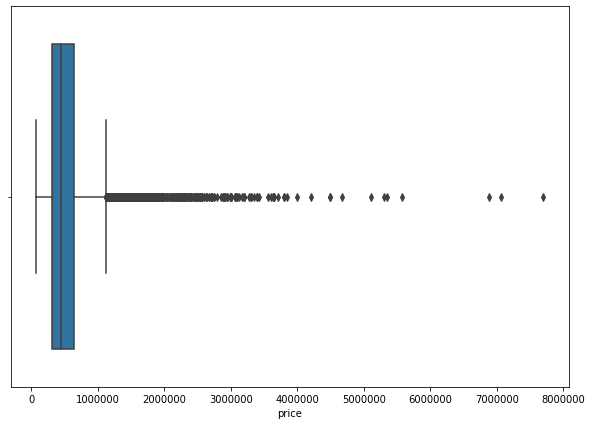

In [4]:
#Visualize housing prices and identify outliers
fig = plt.figure(figsize=(10,7))
sns.boxplot(data['price'])


In [5]:
data_box_states = boxplot_stats(data['price'])
data_box_states

[{'mean': 540088.1417665294,
  'iqr': 323050.0,
  'cilo': 446550.0573865496,
  'cihi': 453449.9426134504,
  'whishi': 1127500.0,
  'whislo': 75000.0,
  'fliers': array([1225000., 2000000., 1350000., ..., 1222500., 1575000., 1537000.]),
  'q1': 321950.0,
  'med': 450000.0,
  'q3': 645000.0}]

In [6]:
upper_limit = data_box_states[0]['whishi']
print('upper_limit: %f'%upper_limit)

upper_limit: 1127500.000000


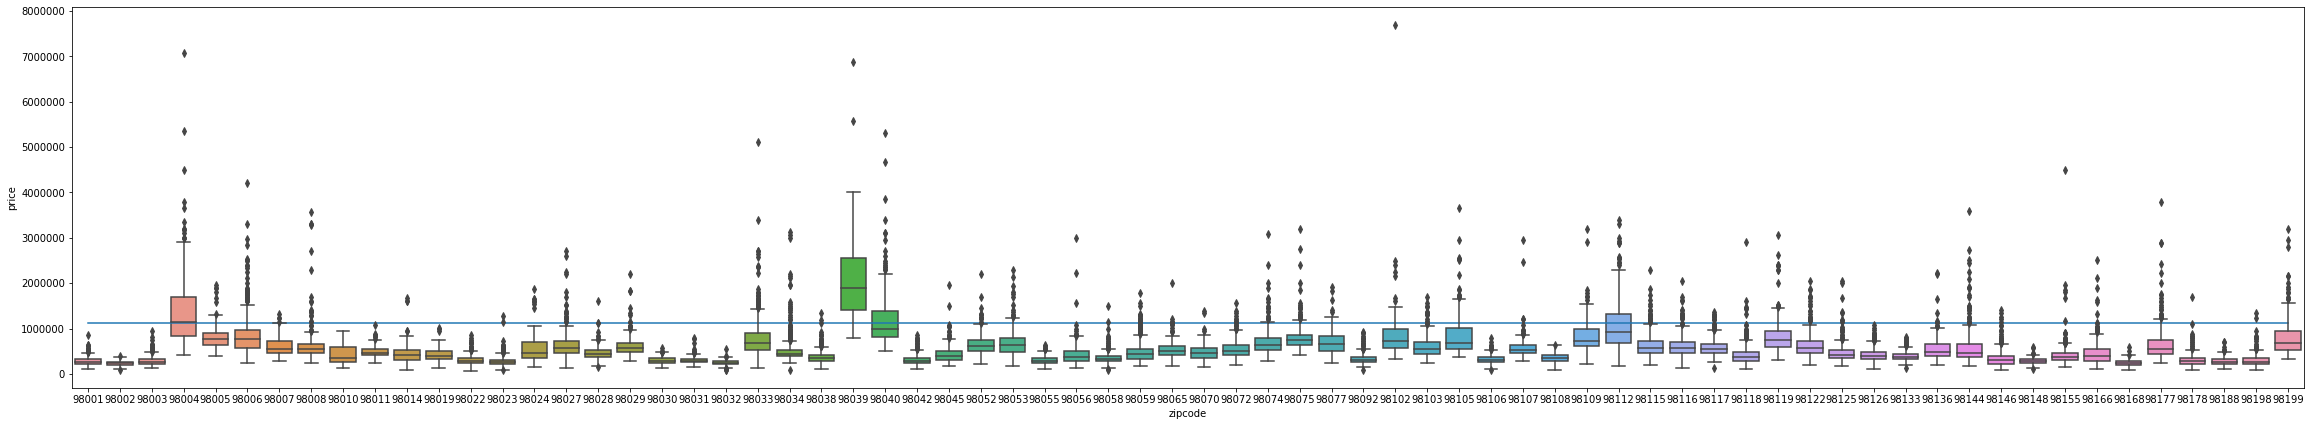

In [7]:
#check outlier by zipcode
price_and_zip = pd.concat([data['zipcode'],data['price']], axis = 1)
zip_group = price_and_zip.groupby('zipcode')
price_and_zip.sum()
fig = plt.figure(figsize=(40,7))
plt.plot([upper_limit]*70)
sns.boxplot(x=price_and_zip['zipcode'],y=price_and_zip['price'])

In [8]:
#Visualize the price trend over months and years

#append month and year column
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].apply(lambda x:x.month)
data['year'] = data['date'].apply(lambda x:x.year)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


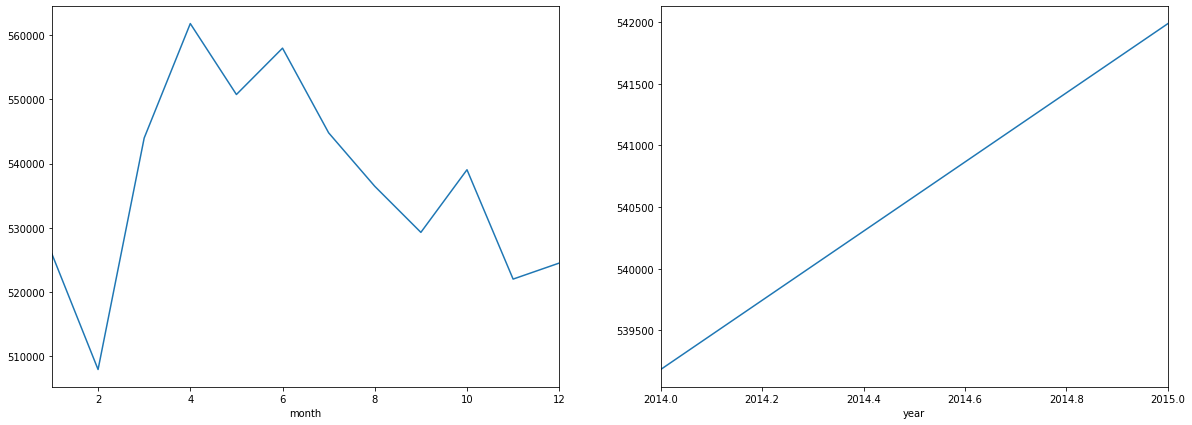

In [9]:
fig = plt.figure(figsize=(20, 7))
fig.add_subplot(1,2,1)
data.groupby('month').mean()['price'].plot()
fig.add_subplot(1,2,2)
data.groupby('year').mean()['price'].plot()

In [10]:
#replace date feature with year and month
data = data.drop(['date'], axis=1)

[Text(0.5, 0, 'id'),
 Text(1.5, 0, 'price'),
 Text(2.5, 0, 'bedrooms'),
 Text(3.5, 0, 'bathrooms'),
 Text(4.5, 0, 'sqft_living'),
 Text(5.5, 0, 'sqft_lot'),
 Text(6.5, 0, 'floors'),
 Text(7.5, 0, 'waterfront'),
 Text(8.5, 0, 'view'),
 Text(9.5, 0, 'condition'),
 Text(10.5, 0, 'grade'),
 Text(11.5, 0, 'sqft_above'),
 Text(12.5, 0, 'sqft_basement'),
 Text(13.5, 0, 'yr_built'),
 Text(14.5, 0, 'yr_renovated'),
 Text(15.5, 0, 'zipcode'),
 Text(16.5, 0, 'lat'),
 Text(17.5, 0, 'long'),
 Text(18.5, 0, 'sqft_living15'),
 Text(19.5, 0, 'sqft_lot15'),
 Text(20.5, 0, 'month'),
 Text(21.5, 0, 'year')]

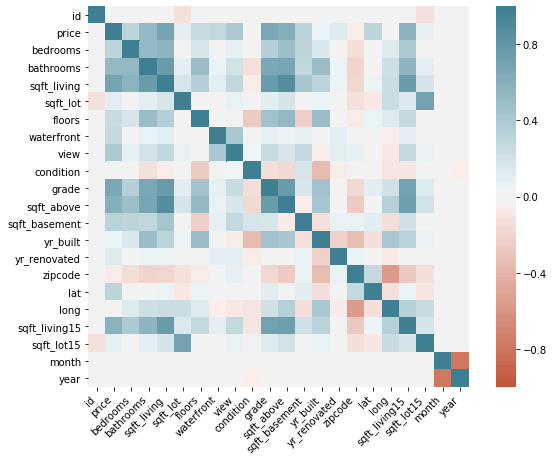

In [11]:
#Visualize the relationship betwee features
corr = data.corr()
f, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [12]:
#Drop highly correlated features (p>0.9)
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
zipped_col = zip(data.columns,columns)
for col in tuple(zipped_col):
        print(col)

#Drop unwanted features (id, lat, long, view)
to_drop = ['id', 'month']#,'lat','long','view'
data = data.drop(to_drop, axis=1)
data

('id', True)
('price', True)
('bedrooms', True)
('bathrooms', True)
('sqft_living', True)
('sqft_lot', True)
('floors', True)
('waterfront', True)
('view', True)
('condition', True)
('grade', True)
('sqft_above', True)
('sqft_basement', True)
('yr_built', True)
('yr_renovated', True)
('zipcode', True)
('lat', True)
('long', True)
('sqft_living15', True)
('sqft_lot15', True)
('month', True)
('year', True)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,2014
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,2015
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,2014
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,2015


In [13]:
data.shape

(21613, 20)

In [14]:
y = data['price'].values
X = data.drop('price',axis =1).values
#withhold button 20% of dataset as test dataset
# train_count = int(X.shape[0]*0.8)
# test_count = X.shape[0]-train_count

# X_train, X_test, y_train, y_test = X[:train_count], X[train_count:],y[:train_count], y[train_count:]
# print('train count: %d'%X_train.shape[0])
# print('test count: %d'%X_test.shape[0])
# X_train.shape

In [15]:
#Spliting dataset into test(20%) and train(80%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
#transform dataset
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train_scaled = s_scaler.fit_transform(X_train.astype(np.float))
X_test_scaled = s_scaler.transform(X_test.astype(np.float))

In [29]:
X_train_scaled[0]

array([-0.39526335, -0.47445144, -0.32393262, -0.04387306, -0.91959976,
       -0.08499166, -0.30591651,  0.90907268,  1.15024328, -0.00725676,
       -0.65631017,  0.40400107, -0.20829394, -0.6746308 , -1.39660754,
        0.44228847,  1.12607326,  0.01344043, -0.68884041])

In [18]:
#save train data
data_dir = './data'
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
X_train_df = pd.DataFrame(X_train_scaled, columns= data.columns[1:])
y_train_df = pd.DataFrame(y_train, columns= ['price'])
X_test_df = pd.DataFrame(X_test_scaled, columns= data.columns[1:])
y_test_df = pd.DataFrame(y_test, columns= ['price'])
pd.concat([X_train_df, y_train_df], axis=1).to_csv(os.path.join(data_dir, 'train.csv'), header=True, index=False)
pd.concat([pd.DataFrame(X_test_df), pd.DataFrame(y_test_df)], axis=1).to_csv(os.path.join(data_dir, 'test.csv'), header=True, index=False)

In [19]:
X_train_df.shape

(17290, 19)

In [ ]:
#Upload data to S3
sagemaker_session = sagemaker.Session()
bucket = sagemaker_session.default_bucket()
prefix = 'sagemaker/HousingPricePrediction_nn'
role = sagemaker.get_execution_role()

In [ ]:
input_data = sagemaker_session.upload_data(path=data_dir, bucket=bucket, key_prefix=prefix)

### Algorithms and Techniques
##### ? transform train data?
##### [Adam optimizer](https://keras.io/api/optimizers/adam/)
##### [Keras on Sagemaker](https://blog.betomorrow.com/keras-in-the-cloud-with-amazon-sagemaker-67cf11fb536)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

def keras_model_fn(hyperparameters):
    #create a fully connected network
    model = Sequential()
    model.add(Dense(19,activation='relu'))
    model.add(Dense(19,activation='relu'))
    model.add(Dense(19,activation='relu'))
    model.add(Dense(19,activation='relu'))
    #model.add(Dense(10,activation='relu'))
    model.add(Dense(1))
    opt = Adam(
        learning_rate=hyperparameters['learning_rate'], 
        beta_1=hyperparameters['beta_1'],
        beta_2=hyperparameters['beta_2'],
        epsilon = hyperparameters['epsilon']
    )
    model.compile(optimizer=opt ,loss='mse', metrics=['mse'])
    return model

In [30]:
temp_hp = {'learning_rate':0.001, 'beta_1':0.9, 'beta_2':0.999, 'epsilon':1e-7}
model = keras_model_fn(temp_hp)

In [31]:
model.fit(x=X_train_scaled,y=y_train,
          validation_data=(X_test_scaled,y_test),
          batch_size=128,epochs=400)
model.summary()

Train on 17290 samples, validate on 4323 samples
Epoch 1/400
17290/17290 [==============================] - 1s 35us/sample - loss: 419813720249.7296 - mse: 419813752832.0000 - val_loss: 452785084775.5724 - val_mse: 452785111040.0000
Epoch 2/400
17290/17290 [==============================] - 0s 10us/sample - loss: 416993206249.2576 - mse: 416993181696.0000 - val_loss: 442033307299.3236 - val_mse: 442033340416.0000
Epoch 3/400
17290/17290 [==============================] - 0s 10us/sample - loss: 378623105255.4513 - mse: 378623098880.0000 - val_loss: 349704674204.2767 - val_mse: 349704617984.0000
Epoch 4/400
17290/17290 [==============================] - 0s 11us/sample - loss: 229081920893.7643 - mse: 229081874432.0000 - val_loss: 145460438765.7016 - val_mse: 145460428800.0000
Epoch 5/400
17290/17290 [==============================] - 0s 11us/sample - loss: 92220079339.5970 - mse: 92220121088.0000 - val_loss: 84392751493.4185 - val_mse: 84392763392.0000
Epoch 6/400
17290/17290 [==========

Epoch 46/400
17290/17290 [==============================] - 0s 10us/sample - loss: 29736509080.1490 - mse: 29736505344.0000 - val_loss: 35049703944.6459 - val_mse: 35049705472.0000
Epoch 47/400
17290/17290 [==============================] - 0s 10us/sample - loss: 29662224683.2046 - mse: 29662220288.0000 - val_loss: 34945401740.6431 - val_mse: 34945400832.0000
Epoch 48/400
17290/17290 [==============================] - 0s 10us/sample - loss: 29577582565.0526 - mse: 29577578496.0000 - val_loss: 34866217444.1675 - val_mse: 34866216960.0000
Epoch 49/400
17290/17290 [==============================] - 0s 10us/sample - loss: 29506267212.2818 - mse: 29506271232.0000 - val_loss: 34972999265.4731 - val_mse: 34973003776.0000
Epoch 50/400
17290/17290 [==============================] - 0s 10us/sample - loss: 29457584605.2349 - mse: 29457582080.0000 - val_loss: 34714923196.5505 - val_mse: 34714923008.0000
Epoch 51/400
17290/17290 [==============================] - 0s 10us/sample - loss: 29350635842.

17290/17290 [==============================] - 0s 10us/sample - loss: 27206924686.9395 - mse: 27206926336.0000 - val_loss: 32563559987.0460 - val_mse: 32563560448.0000
Epoch 92/400
17290/17290 [==============================] - 0s 10us/sample - loss: 27157335604.6510 - mse: 27157338112.0000 - val_loss: 32492308850.9424 - val_mse: 32492306432.0000
Epoch 93/400
17290/17290 [==============================] - 0s 10us/sample - loss: 27160291416.7190 - mse: 27160295424.0000 - val_loss: 32473273566.8971 - val_mse: 32473274368.0000
Epoch 94/400
17290/17290 [==============================] - 0s 10us/sample - loss: 27067646331.8691 - mse: 27067648000.0000 - val_loss: 32408606585.9301 - val_mse: 32408606720.0000
Epoch 95/400
17290/17290 [==============================] - 0s 10us/sample - loss: 27059746361.1521 - mse: 27059738624.0000 - val_loss: 32370358286.2124 - val_mse: 32370358272.0000
Epoch 96/400
17290/17290 [==============================] - 0s 10us/sample - loss: 27050954908.3540 - mse: 2

17290/17290 [==============================] - 0s 12us/sample - loss: 25758402740.5178 - mse: 25758404608.0000 - val_loss: 31119350860.5098 - val_mse: 31119349760.0000
Epoch 137/400
17290/17290 [==============================] - 0s 10us/sample - loss: 25749934095.0431 - mse: 25749934080.0000 - val_loss: 31089578243.6123 - val_mse: 31089580032.0000
Epoch 138/400
17290/17290 [==============================] - 0s 10us/sample - loss: 25698876212.9767 - mse: 25698871296.0000 - val_loss: 31041907295.8149 - val_mse: 31041904640.0000
Epoch 139/400
17290/17290 [==============================] - 0s 10us/sample - loss: 25662802812.4021 - mse: 25662812160.0000 - val_loss: 31109447736.8494 - val_mse: 31109445632.0000
Epoch 140/400
17290/17290 [==============================] - 0s 10us/sample - loss: 25644991302.6258 - mse: 25644988416.0000 - val_loss: 30999379383.3986 - val_mse: 30999379968.0000
Epoch 141/400
17290/17290 [==============================] - 0s 10us/sample - loss: 25626899923.9958 - m

17290/17290 [==============================] - 0s 10us/sample - loss: 24839772181.5579 - mse: 24839772160.0000 - val_loss: 30114188662.0217 - val_mse: 30114189312.0000
Epoch 182/400
17290/17290 [==============================] - 0s 10us/sample - loss: 24858678382.7507 - mse: 24858673152.0000 - val_loss: 30091219335.7872 - val_mse: 30091214848.0000
Epoch 183/400
17290/17290 [==============================] - 0s 10us/sample - loss: 24812137715.1778 - mse: 24812142592.0000 - val_loss: 30053564784.0999 - val_mse: 30053564416.0000
Epoch 184/400
17290/17290 [==============================] - 0s 10us/sample - loss: 24787383681.9100 - mse: 24787372032.0000 - val_loss: 30029985578.8147 - val_mse: 30029985792.0000
Epoch 185/400
17290/17290 [==============================] - 0s 10us/sample - loss: 24839389093.2673 - mse: 24839389184.0000 - val_loss: 30155146616.3905 - val_mse: 30155149312.0000
Epoch 186/400
17290/17290 [==============================] - 0s 10us/sample - loss: 24749957410.7947 - m

17290/17290 [==============================] - 0s 10us/sample - loss: 24019044243.8552 - mse: 24019042304.0000 - val_loss: 29433436388.3451 - val_mse: 29433438208.0000
Epoch 227/400
17290/17290 [==============================] - 0s 10us/sample - loss: 23985529697.9877 - mse: 23985530880.0000 - val_loss: 29427446041.8783 - val_mse: 29427443712.0000
Epoch 228/400
17290/17290 [==============================] - 0s 10us/sample - loss: 23973535984.7496 - mse: 23973535744.0000 - val_loss: 29384995247.1080 - val_mse: 29384998912.0000
Epoch 229/400
17290/17290 [==============================] - 0s 10us/sample - loss: 23923403644.4021 - mse: 23923402752.0000 - val_loss: 29438228607.9112 - val_mse: 29438228480.0000
Epoch 230/400
17290/17290 [==============================] - 0s 10us/sample - loss: 23960880060.1282 - mse: 23960879104.0000 - val_loss: 29372449095.3579 - val_mse: 29372452864.0000
Epoch 231/400
17290/17290 [==============================] - 0s 10us/sample - loss: 23938789986.9650 - m

17290/17290 [==============================] - 0s 10us/sample - loss: 23347141493.7689 - mse: 23347138560.0000 - val_loss: 28988751503.9001 - val_mse: 28988749824.0000
Epoch 272/400
17290/17290 [==============================] - 0s 10us/sample - loss: 23323813529.3335 - mse: 23323817984.0000 - val_loss: 28959504938.2817 - val_mse: 28959502336.0000
Epoch 273/400
17290/17290 [==============================] - 0s 10us/sample - loss: 23332601606.5444 - mse: 23332599808.0000 - val_loss: 28928457565.7423 - val_mse: 28928456704.0000
Epoch 274/400
17290/17290 [==============================] - 0s 10us/sample - loss: 23307872411.9986 - mse: 23307872256.0000 - val_loss: 28915401275.3366 - val_mse: 28915402752.0000
Epoch 275/400
17290/17290 [==============================] - 0s 10us/sample - loss: 23290032441.1817 - mse: 23290032128.0000 - val_loss: 28933418263.7465 - val_mse: 28933423104.0000
Epoch 276/400
17290/17290 [==============================] - 0s 10us/sample - loss: 23298074178.2728 - m

17290/17290 [==============================] - 0s 10us/sample - loss: 22750122408.9985 - mse: 22750117888.0000 - val_loss: 28560931420.9725 - val_mse: 28560932864.0000
Epoch 317/400
17290/17290 [==============================] - 0s 11us/sample - loss: 22725502038.3500 - mse: 22725502976.0000 - val_loss: 28622483158.4881 - val_mse: 28622483456.0000
Epoch 318/400
17290/17290 [==============================] - 0s 10us/sample - loss: 22690566696.7172 - mse: 22690564096.0000 - val_loss: 28560420749.8274 - val_mse: 28560422912.0000
Epoch 319/400
17290/17290 [==============================] - 0s 10us/sample - loss: 22702535751.7807 - mse: 22702538752.0000 - val_loss: 28536038593.5249 - val_mse: 28536035328.0000
Epoch 320/400
17290/17290 [==============================] - 0s 10us/sample - loss: 22680739735.7640 - mse: 22680741888.0000 - val_loss: 28524289143.6206 - val_mse: 28524290048.0000
Epoch 321/400
17290/17290 [==============================] - 0s 10us/sample - loss: 22675286342.6850 - m

17290/17290 [==============================] - 0s 10us/sample - loss: 22177342945.2622 - mse: 22177353728.0000 - val_loss: 28268126529.6729 - val_mse: 28268124160.0000
Epoch 362/400
17290/17290 [==============================] - 0s 10us/sample - loss: 22193082013.3608 - mse: 22193082368.0000 - val_loss: 28330489279.4522 - val_mse: 28330489856.0000
Epoch 363/400
17290/17290 [==============================] - 0s 12us/sample - loss: 22169119703.4901 - mse: 22169120768.0000 - val_loss: 28258172627.6456 - val_mse: 28258170880.0000
Epoch 364/400
17290/17290 [==============================] - 0s 10us/sample - loss: 22120913480.1953 - mse: 22120906752.0000 - val_loss: 28199597179.8843 - val_mse: 28199591936.0000
Epoch 365/400
17290/17290 [==============================] - 0s 10us/sample - loss: 22152459269.5672 - mse: 22152460288.0000 - val_loss: 28188334479.3671 - val_mse: 28188332032.0000
Epoch 366/400
17290/17290 [==============================] - 0s 10us/sample - loss: 22116011186.7410 - m

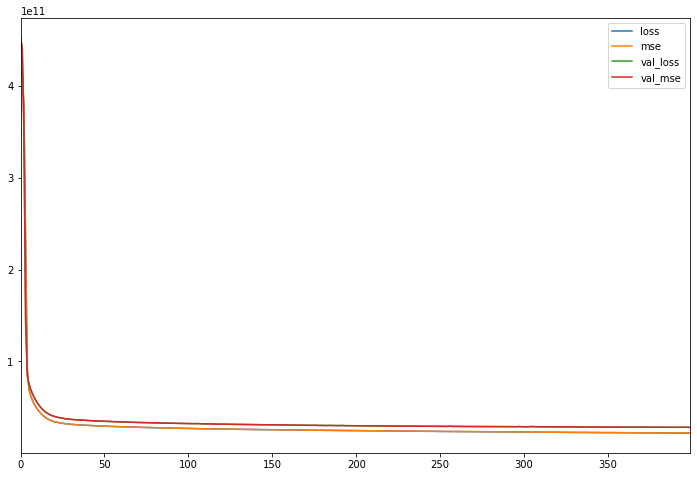

In [32]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

In [33]:
from sklearn import metrics
y_pred = model.predict(X_test)
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('R2:', metrics.r2_score(y_test, y_pred))

MSE: 1.2677984383874378e+19
R2: -83862018.4513416


### Benchmark

## Methodology

## Results

In [ ]:
data.columns[1:]

### Clean up
- [ ] delete__init__ in train folder


### Test Section

In [ ]:
# ******** testing script *************
import tensorflow as tf
#from tensorflow.estimator import DNNClassifier
train_path = data_dir+'/train.csv'
train_ds = tf.data.experimental.make_csv_dataset(
    file_pattern=train_path, batch_size=5, 
    column_names=data.columns, label_name = data.columns[0],
    header=False, num_epochs=1, shuffle=False
)


In [ ]:
for batch in train_ds:
    feature, data = batch
    print(data)

In [ ]:
def show_batch(dataset):
  for batch, label in dataset.take(1):
    for key, value in batch.items():
      print("{:20s}: {}".format(key,value.numpy()))

In [ ]:
show_batch(train_ds)

In [ ]:
from train.model import DNN
from tensorflow.keras.optimizers import Adam
model = DNN(input_dim=18,hidden_dim=[18,18],output_dim=1).model
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt ,loss='mse', metrics=['mse'])

In [ ]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=4)
model.summary()

In [ ]:
def train(model, data_path, batch_size, epochs, optimizer):
    print("Fit model on training data")  
    data = pd.read_csv(data_path)
    y_train = data['price'].values
    x_train = data.drop('price',axis =1).values
    x_val = x_train[-10000:]
    y_val = y_train[-10000:]
    model.compile(optimizer=optimizer ,loss='mse', metrics=['mse'])
    history = model.fit(
        x_train,
        y_train,
        batch_size=batch_size,
        epochs=epochs,
        # monitoring validation loss and metrics at the end of each epoch       
        validation_data=(x_val, y_val)
    )
    model.summary()
    loss_df = pd.DataFrame(model.history.history)
    loss_df.plot(figsize=(12,8))

In [ ]:
from train.model import DNN
model = DNN(18, [18,18] , 1).model


In [38]:
import tensorflow as tf
def _input(mode, data_dir):
    """
    Args:
        mode: Standard names for model modes (tf.estimators.ModeKeys).
        batch_size: The number of samples per batch of input requested.
    """
    dataset = pd.read_csv(file_name(mode, data_dir))
    y = dataset['price'].values
    X = dataset.drop('price',axis =1).values
    return X, y


def file_name(mode, data_dir):   
    if mode == tf.estimator.ModeKeys.EVAL:
        print('test')
        name = data_dir+'/test.csv'
        print(name)
    elif mode == tf.estimator.ModeKeys.TRAIN:
        print('train')
        name = data_dir+'/train.csv'
    
    return name

In [39]:
data_dir = './data'
mode = tf.estimator.ModeKeys.TRAIN
check_x, check_y = _input(mode, data_dir)

train


In [42]:
check_y[0]

325000.0